## Neo4j Code to load data, nodes, properties and relationships
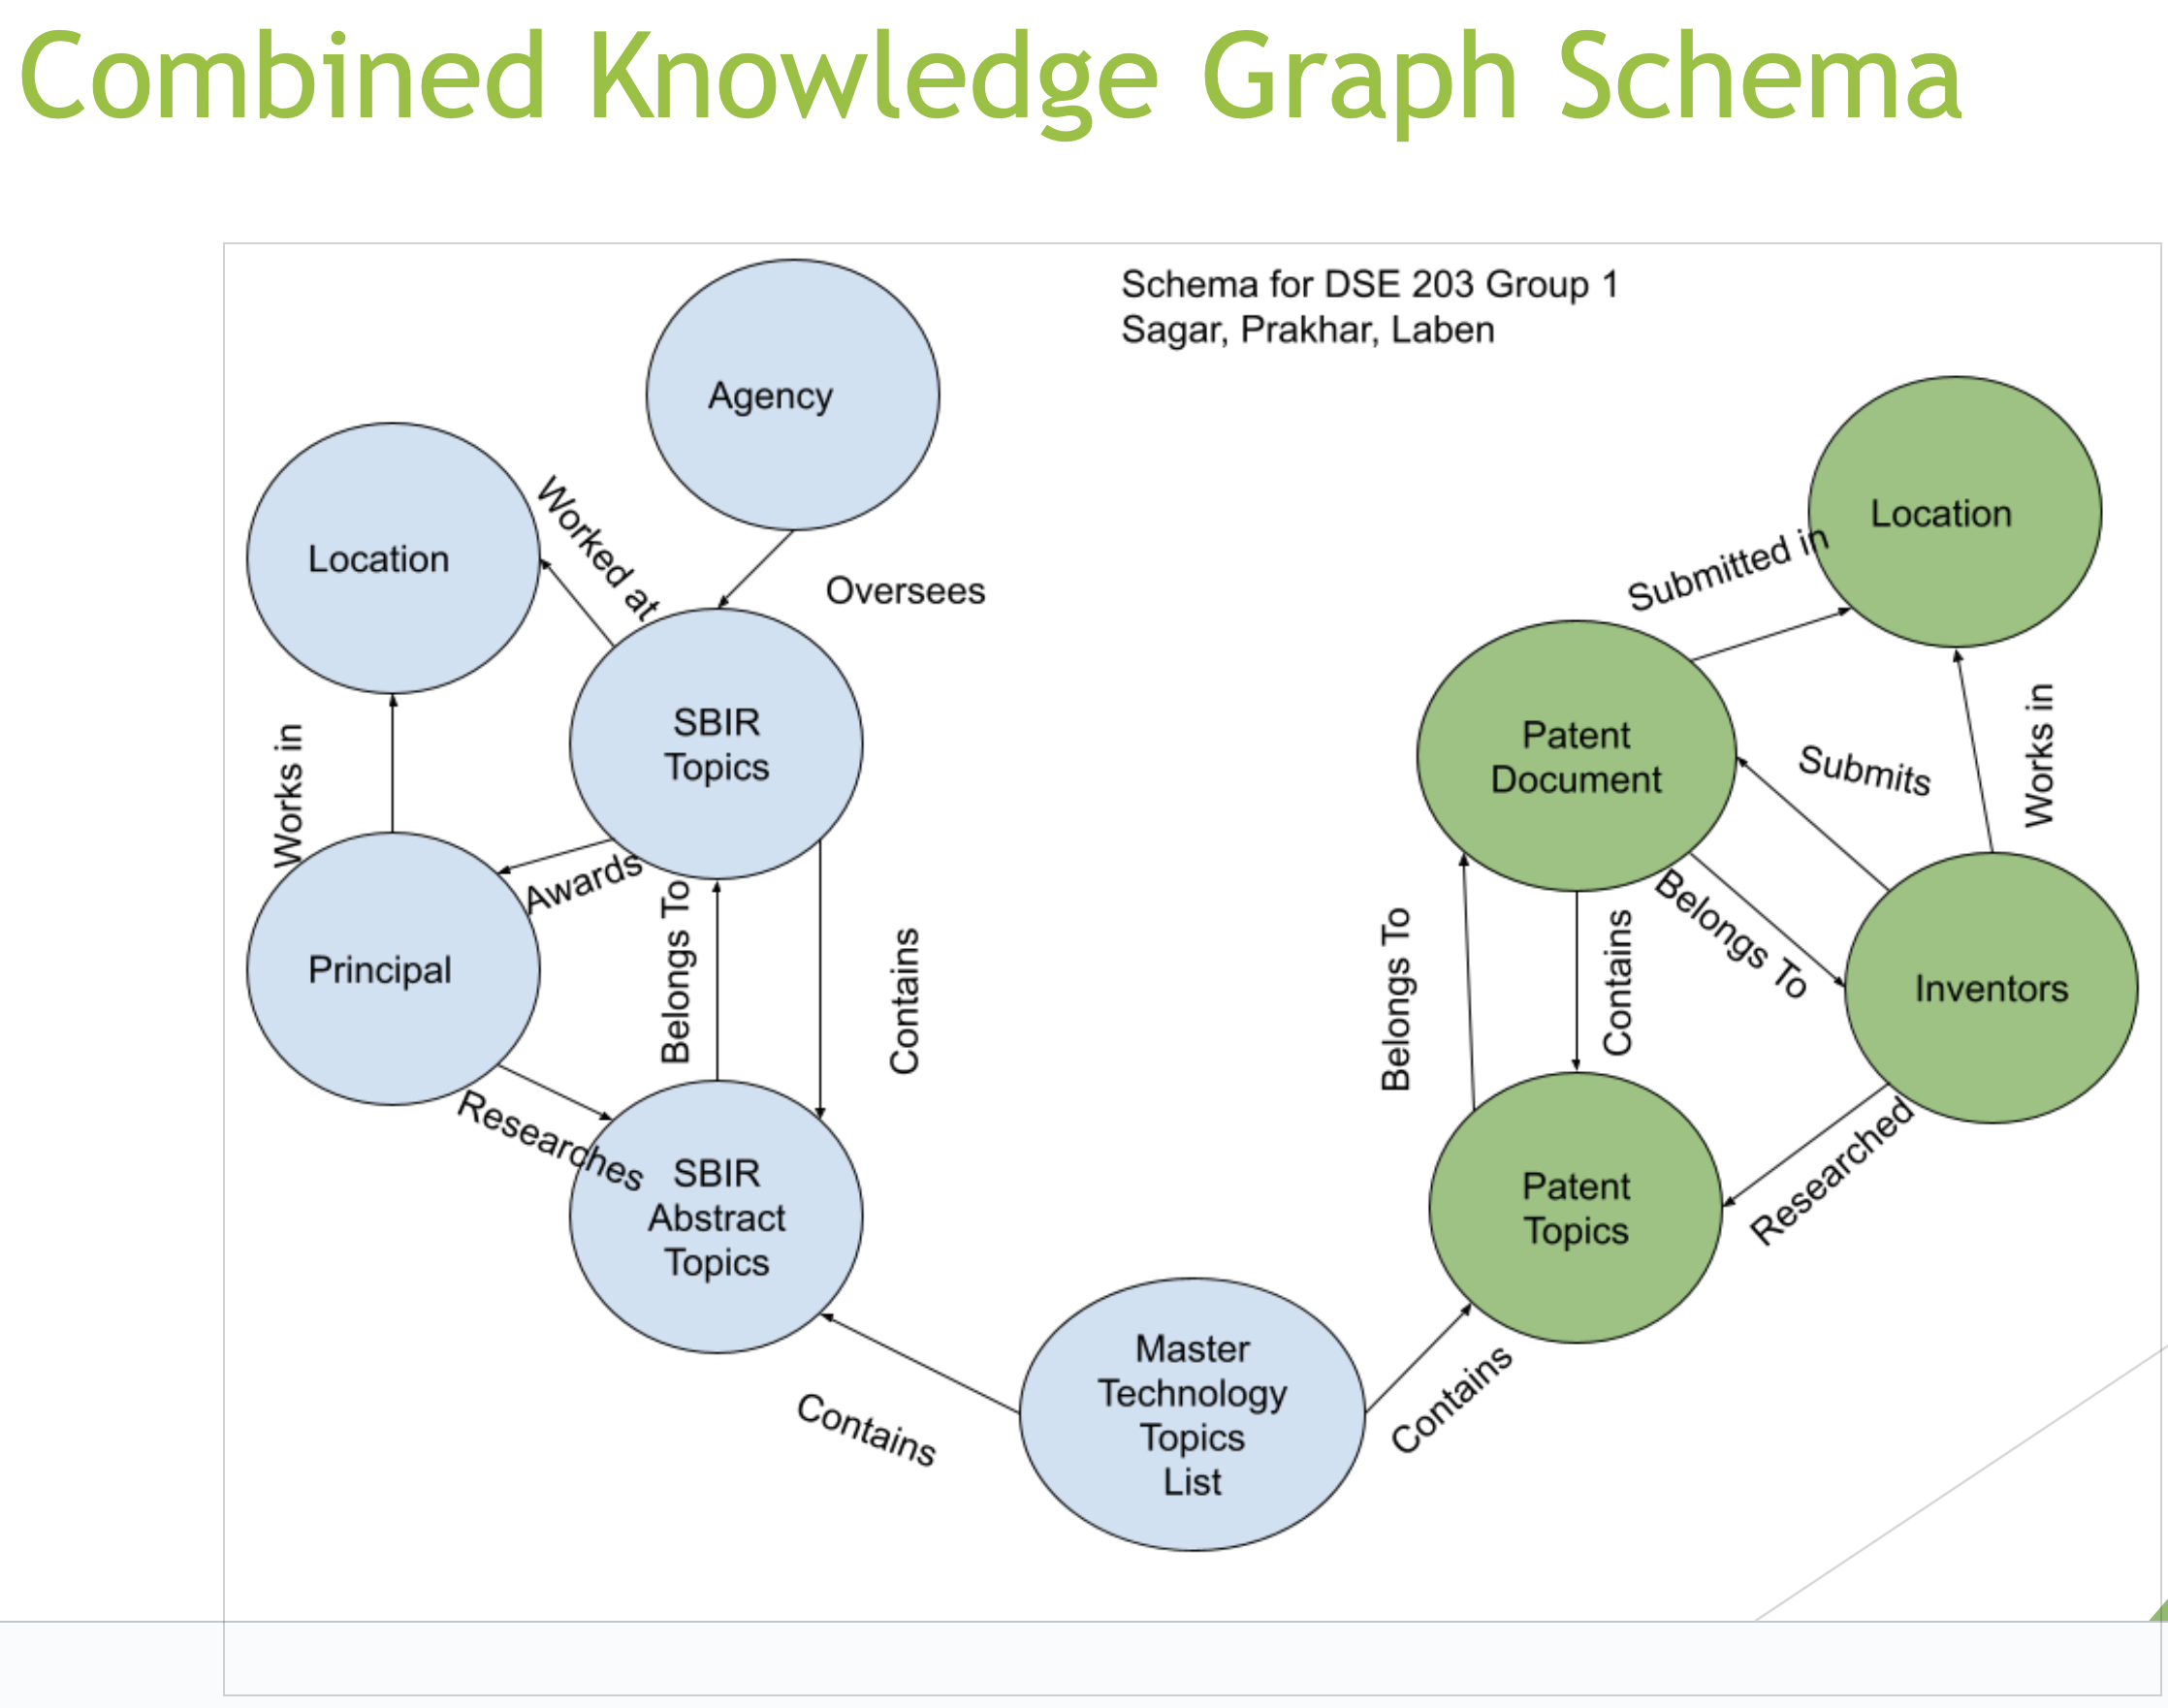

In [1]:
## 1- Install neo4j Desktop
## 2- Create local database with authentication (user name /password)
## 3- Export csv from relational database & xml file
## 4- Copy Data files to neo4j data directory
##/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/neo4jDatabases/database-<your-db-id>/installation-4.3.7/import/
## my local neo4j directory 
###ls "/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import"


In [2]:
## install 
#pip install py2neo

In [3]:
from py2neo import Graph

In [4]:
# Connect to your Neo4j database
graph = Graph("bolt://localhost:7687", auth=("neo4j", "Welcome19#"))

In [6]:
cp './input_files/award_data.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import'

In [7]:
ls "/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import"

award_data.csv   sbir_sample.csv


In [8]:
# Define the Cypher query to load data and nodes from SBIR
# test with smaller set of data (sbir_sample.csv) as neo4j imports takes time , replace for full file as file:///award_data.csv
cypher_query = """
LOAD CSV WITH HEADERS FROM 'file:///sbir_sample.csv' AS row

// Create Location nodes
MERGE (location:Location {
  city: COALESCE(row.City, 'Unknown'),
  state: COALESCE(row.State, 'Unknown'),
  zip: COALESCE(row.Zip, 'Unknown'),
  address1: COALESCE(row.Address1, 'Unknown'),
  address2: COALESCE(row.Address2, 'Unknown')
}
)

// Create Agency nodes
MERGE (agency:Agency {
  name: COALESCE(row.Agency, 'Unknown'),
  branch: COALESCE(row.Branch, 'Unknown')
})


// Create SBIR Topic nodes
MERGE (sbirTopic:SBIRTopic {
  code: COALESCE(row.`Topic Code`, 'Unknown')
})



// Create Principal nodes
MERGE (principal:Principal {
  name: COALESCE(row.`PI Name`, 'Unknown'),
  title: COALESCE(row.`PI Title`, 'Unknown')
})


// Create Abstract nodes (will be changed to technical phrases later)
MERGE (abstract:Abstract {
  text: row.Abstract
})
;
"""

# Execute the Cypher query
graph.run(cypher_query)

(No data)

In [9]:
## Queries to run on neo4j directly to check status
## What kind of nodes exists
cypher_query_check = """CALL db.schema.visualization()"""
graph.run(cypher_query_check)

nodes,relationships
"[(_-48:SBIRTopic {constraints: [], indexes: [], name: 'SBIRTopic'}), (_-47:Agency {constraints: [], indexes: [], name: 'Agency'}), (_-50:Abstract {constraints: [], indexes: [], name: 'Abstract'}), (_-49:Principal {constraints: [], indexes: [], name: 'Principal'}), (_-46:Location {constraints: [], indexes: [], name: 'Location'})]",[]


In [10]:
# // List node labels
cypher_query_check = """CALL db.labels()"""
graph.run(cypher_query_check)

label
Location
Agency
SBIRTopic


In [11]:
# // Count all nodes
cypher_query_check = """
MATCH (n)
RETURN count(n)
"""
graph.run(cypher_query_check)

count(n)
3752
